# Project Practices 5
Mushrooms Dataset

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [7]:
d4=pd.read_csv('mushrooms.csv')
d4.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
d4.columns

Index(['class', ' cap-shape ', 'cap-surface', 'cap-color ', 'bruises ',
       '  odor  ', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color ', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring ', 'veil-type', 'veil-color', 'ring-number',
       'ring-type ', 'spore-print-color', 'population', ' habitat'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in d4.columns:
    d4[i]=le.fit_transform(d4[i])

In [10]:
d4.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
d4.nunique()

class                        2
 cap-shape                   6
cap-surface                  4
cap-color                   10
bruises                      2
  odor                       9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
 habitat                     7
dtype: int64

In [12]:
#veil-type column is showing only 0 values.So it can be dropped

In [13]:
d4.drop('veil-type',axis=1,inplace=True)

In [14]:
d4.isnull().sum()

class                       0
 cap-shape                  0
cap-surface                 0
cap-color                   0
bruises                     0
  odor                      0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
 habitat                    0
dtype: int64

In [15]:
#there are no null values in this dataset

In [16]:
d4.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [17]:
#median is greater than mean for cap surface,odor,gill attachment,gill colour etc,that means they are left skewed datas
#there is some difference between 75% and maximum for odor,gill color,habitat etc..so there are chances for presence of outliers

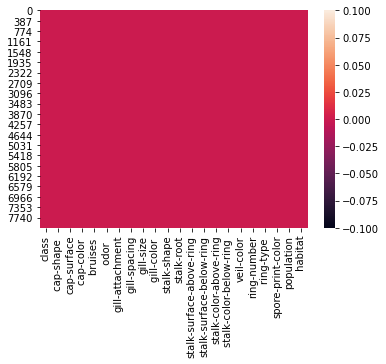

In [18]:
sns.heatmap(d4.isnull())

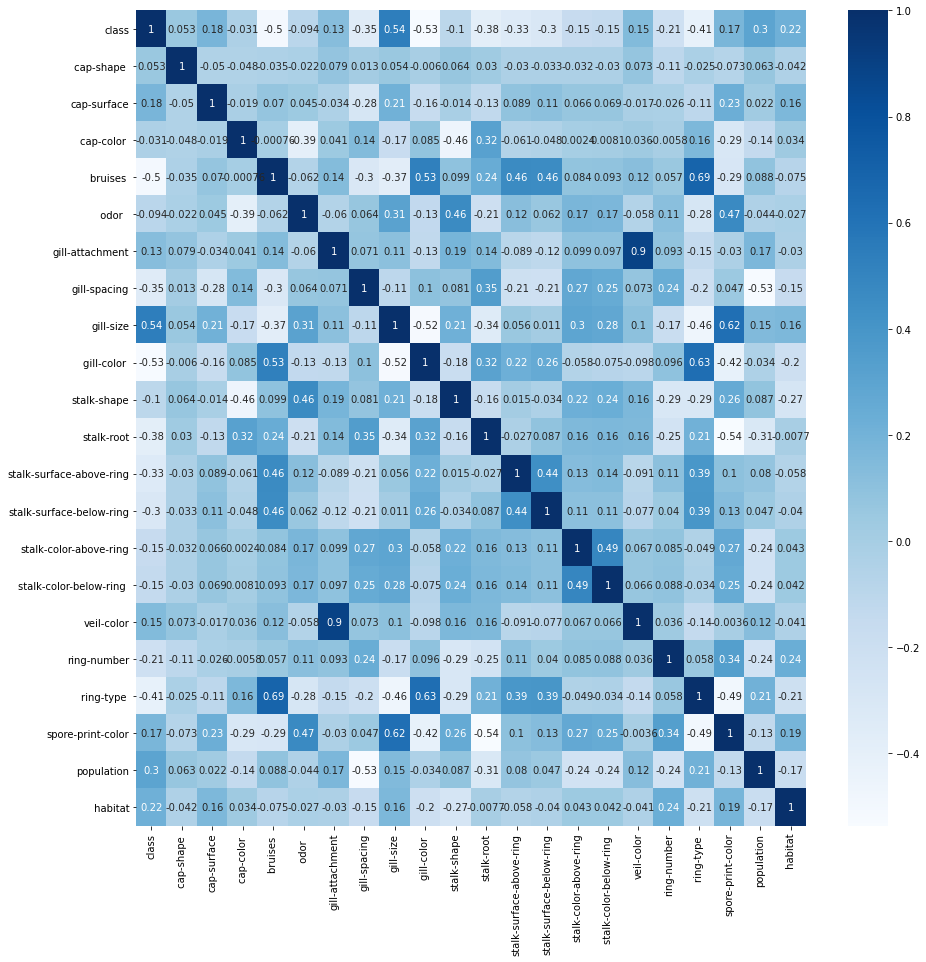

In [19]:
d4cor=d4.corr()
plt.figure(figsize=(15,15))
sns.heatmap(d4cor,cmap='Blues',annot=True)

In [20]:
#class is having a strong negative relation with ring type,gill colour and bruises

In [21]:
collist=d4.columns.values
ncol=22
nrows=8

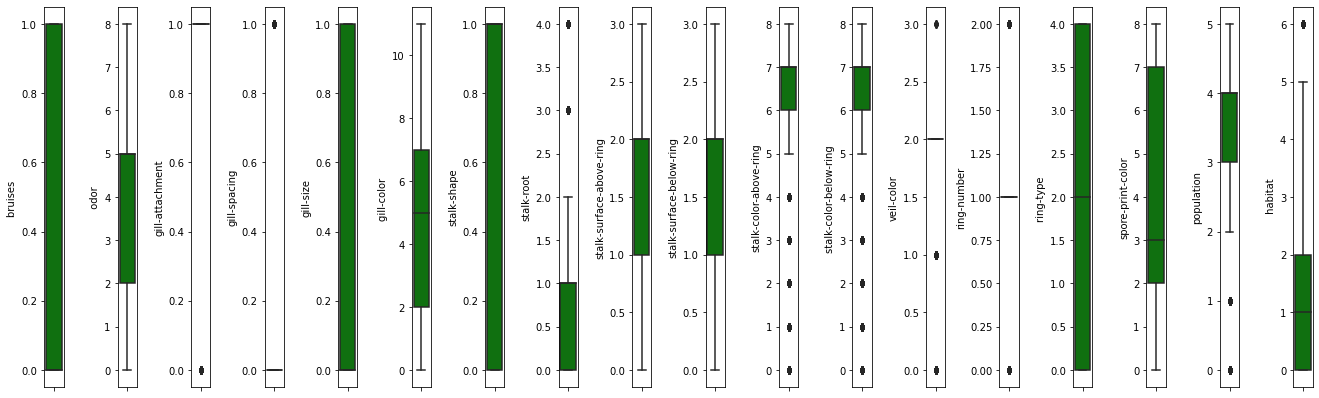

In [22]:
plt.figure(figsize=(ncol,2*ncol))
for i in range(4,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d4[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [23]:
d4.skew()

class                       0.071946
 cap-shape                 -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
  odor                     -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
 habitat                    0.985548
dtype: float64

In [24]:
#gill attachment,veil color,ring number are highly skewed datas

In [25]:
for col in d4.columns:
    if d4.skew().loc[col]>0.55:
        d4[col]=np.log1p(d4[col])

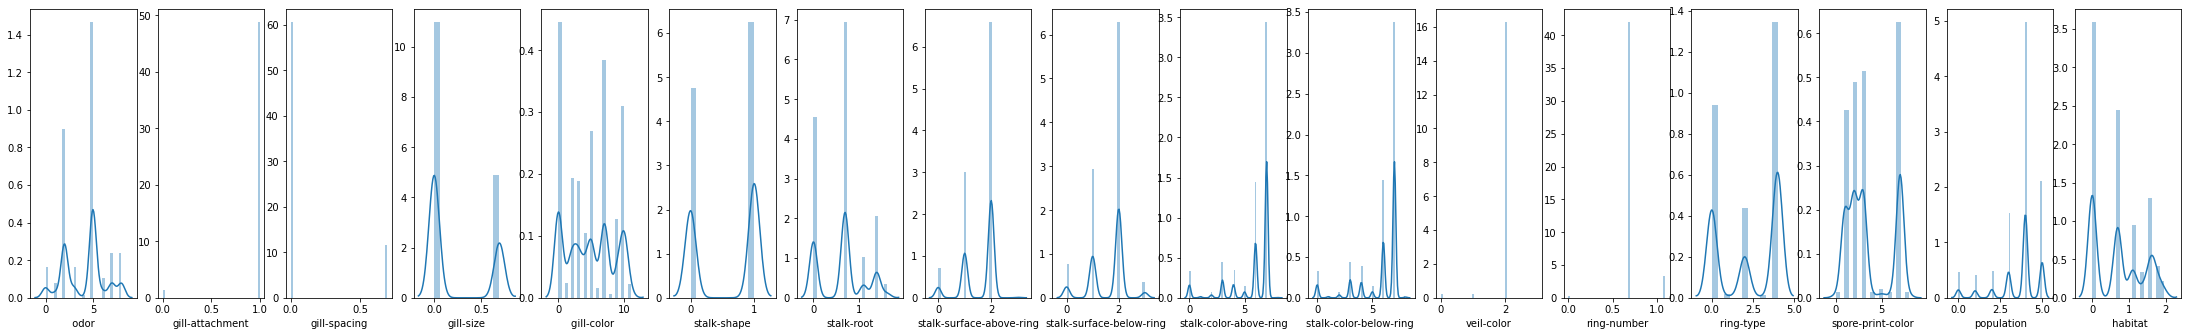

In [26]:
plt.figure(figsize=(50,50))
for i in range(5,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d4[collist[i]])

In [27]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(d4))
z

array([[1.0366127 , 1.02971224, 0.14012794, ..., 0.67019486, 0.5143892 ,
        1.66538931],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.00952861],
       [0.96468045, 2.08704716, 0.14012794, ..., 0.2504706 , 1.31310821,
        1.04722694],
       ...,
       [0.96468045, 0.8403434 , 0.14012794, ..., 1.50964337, 2.11182722,
        0.60863376],
       [1.0366127 , 0.21699152, 0.95327039, ..., 1.42842641, 0.28432981,
        0.60863376],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.16925365, 2.11182722,
        0.60863376]])

In [28]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 16,  6, 16], dtype=int64))


In [29]:
d4_new=d4[(z<3).all(axis=1)]
print(d4.shape)
print(d4_new.shape)

(8124, 22)
(6472, 22)


In [30]:
#nearly 2000 rows are deleted due to presence of outliers

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
x=d4.iloc[:,1:]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,1.609438,1,6,1,0.000000,0.693147,4,0,...,2,2,7,7,2,0.693147,4,2,3,1.791759
1,5,2,2.302585,1,0,1,0.000000,0.000000,4,0,...,2,2,7,7,2,0.693147,4,3,2,0.693147
2,0,2,2.197225,1,3,1,0.000000,0.000000,5,0,...,2,2,7,7,2,0.693147,4,3,2,1.386294
3,5,3,2.197225,1,6,1,0.000000,0.693147,5,0,...,2,2,7,7,2,0.693147,4,2,3,1.791759
4,5,2,1.386294,0,5,1,0.693147,0.000000,4,1,...,2,2,7,7,2,0.693147,0,3,0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,1.609438,0,5,0,0.000000,0.000000,11,0,...,2,2,5,5,1,0.693147,4,0,1,1.098612
8120,5,2,1.609438,0,5,0,0.000000,0.000000,11,0,...,2,2,5,5,0,0.693147,4,0,4,1.098612
8121,2,2,1.609438,0,5,0,0.000000,0.000000,5,0,...,2,2,5,5,1,0.693147,4,0,1,1.098612
8122,3,3,1.609438,0,8,1,0.000000,0.693147,0,1,...,2,1,7,7,2,0.693147,0,7,4,1.098612


In [33]:
y=d4.iloc[:,0]
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.02971224,  0.14012794,  0.02432626, ..., -0.67019486,
        -0.5143892 ,  1.66538931],
       [ 1.02971224,  0.14012794,  1.48137145, ..., -0.2504706 ,
        -1.31310821, -0.00952861],
       [-2.08704716,  0.14012794,  1.25989607, ..., -0.2504706 ,
        -1.31310821,  1.04722694],
       ...,
       [-0.8403434 ,  0.14012794,  0.02432626, ..., -1.50964337,
        -2.11182722,  0.60863376],
       [-0.21699152,  0.95327039,  0.02432626, ...,  1.42842641,
         0.28432981,  0.60863376],
       [ 1.02971224,  0.14012794,  0.02432626, ...,  0.16925365,
        -2.11182722,  0.60863376]])

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [36]:
lr=LogisticRegression()

In [37]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9463087248322147
[[879  50]
 [ 46 813]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       929
           1       0.94      0.95      0.94       859

    accuracy                           0.95      1788
   macro avg       0.95      0.95      0.95      1788
weighted avg       0.95      0.95      0.95      1788



In [38]:
#AUC-ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [39]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob

array([7.39075267e-09, 9.19315576e-01, 9.99996714e-01, ...,
       4.30305439e-01, 9.67224775e-01, 4.02710742e-02])

In [40]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [41]:
fpr

array([0.        , 0.        , 0.        , 0.00107643, 0.00107643,
       0.00215285, 0.00215285, 0.00430571, 0.00430571, 0.00645856,
       0.00645856, 0.00753498, 0.00753498, 0.00861141, 0.00861141,
       0.00968784, 0.00968784, 0.01076426, 0.01076426, 0.01184069,
       0.01184069, 0.01291712, 0.01291712, 0.01399354, 0.01399354,
       0.01506997, 0.01506997, 0.01614639, 0.01614639, 0.01722282,
       0.01722282, 0.01829925, 0.01829925, 0.01937567, 0.01937567,
       0.0204521 , 0.0204521 , 0.02152853, 0.02152853, 0.02368138,
       0.02368138, 0.02583423, 0.02583423, 0.02691066, 0.02691066,
       0.02798708, 0.02798708, 0.03013994, 0.03013994, 0.03229279,
       0.03229279, 0.03336921, 0.03336921, 0.03444564, 0.03444564,
       0.03552207, 0.03552207, 0.03659849, 0.03659849, 0.03767492,
       0.03767492, 0.03875135, 0.03875135, 0.0409042 , 0.0409042 ,
       0.04198062, 0.04198062, 0.04305705, 0.04305705, 0.0452099 ,
       0.0452099 , 0.04628633, 0.04628633, 0.04736276, 0.04736

In [42]:
tpr

array([0.        , 0.00116414, 0.33876601, 0.33876601, 0.35389988,
       0.35389988, 0.37369034, 0.37369034, 0.3806752 , 0.3806752 ,
       0.41443539, 0.41443539, 0.41909197, 0.41909197, 0.42374854,
       0.42374854, 0.44819558, 0.44819558, 0.56344587, 0.56344587,
       0.63678696, 0.63678696, 0.68800931, 0.68800931, 0.69965076,
       0.69965076, 0.70314319, 0.70314319, 0.70896391, 0.70896391,
       0.71362049, 0.71362049, 0.72759022, 0.72759022, 0.74388824,
       0.74388824, 0.75552969, 0.75552969, 0.76251455, 0.76251455,
       0.77532014, 0.77532014, 0.79045402, 0.79045402, 0.8032596 ,
       0.8032596 , 0.80442375, 0.80442375, 0.80791618, 0.80791618,
       0.81024447, 0.81024447, 0.82537835, 0.82537835, 0.82654249,
       0.82654249, 0.83119907, 0.83119907, 0.83701979, 0.83701979,
       0.84167637, 0.84167637, 0.84749709, 0.84749709, 0.85448196,
       0.85448196, 0.8556461 , 0.8556461 , 0.85681024, 0.85681024,
       0.86495925, 0.86495925, 0.87892899, 0.87892899, 0.88125

In [43]:
thresholds

array([1.99999863e+00, 9.99998626e-01, 9.94255050e-01, 9.93973024e-01,
       9.92418989e-01, 9.92415095e-01, 9.91092383e-01, 9.90968975e-01,
       9.90223803e-01, 9.90118047e-01, 9.86148481e-01, 9.85870104e-01,
       9.85442759e-01, 9.85403503e-01, 9.84707528e-01, 9.84546238e-01,
       9.81334190e-01, 9.81316963e-01, 9.63229457e-01, 9.63057530e-01,
       9.49960112e-01, 9.49784071e-01, 9.36123803e-01, 9.35819364e-01,
       9.32374409e-01, 9.32081938e-01, 9.30297705e-01, 9.30138424e-01,
       9.28354565e-01, 9.28085013e-01, 9.26337980e-01, 9.26307959e-01,
       9.22288517e-01, 9.21776692e-01, 9.15554630e-01, 9.14752875e-01,
       9.08765640e-01, 9.08293940e-01, 9.04882945e-01, 9.04180917e-01,
       8.97517021e-01, 8.96010695e-01, 8.91291919e-01, 8.91019316e-01,
       8.85884575e-01, 8.83474573e-01, 8.83107999e-01, 8.81975502e-01,
       8.81287829e-01, 8.79357320e-01, 8.78252780e-01, 8.75856749e-01,
       8.65682818e-01, 8.65454206e-01, 8.65041967e-01, 8.64371103e-01,
      

<function matplotlib.pyplot.show(*args, **kw)>

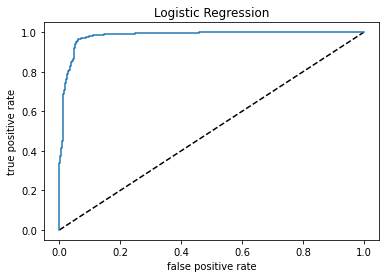

In [44]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Logistic Regression')
plt.show

In [45]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.9463140232402812


In [46]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.9351230425055929
[[878  51]
 [ 65 794]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       929
           1       0.94      0.92      0.93       859

    accuracy                           0.94      1788
   macro avg       0.94      0.93      0.93      1788
weighted avg       0.94      0.94      0.94      1788



In [47]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[929   0]
 [  0 859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [48]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[929   0]
 [  0 859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [49]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[929   0]
 [  0 859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [50]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[929   0]
 [  0 859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



<function matplotlib.pyplot.show(*args, **kw)>

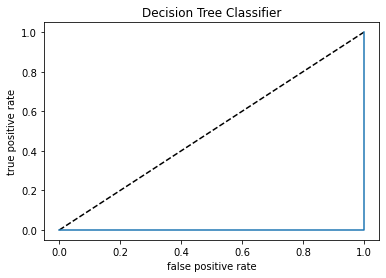

In [51]:
#Decision tree curve
y_pred_prob=dtc.predict_proba(x_test)[:,0]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decision Tree Classifier')
plt.show

In [52]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.9463140232402812


In [53]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[929   0]
 [  0 859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
lrscores=cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.66215385 0.98153846 0.87569231 0.99815385 0.51662562]
0.8068328154604018 0.1881593219285654


In [56]:
gnbscores=cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.70953846 0.952      0.79876923 0.69415385 0.49445813]
0.7297839333080712 0.14912851397799462


In [57]:
svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.84246154 1.         0.97292308 1.         0.60283251]
0.8836434255399773 0.15205214750253565


In [58]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.88184615 1.         0.99261538 1.         0.71428571]
0.9177494505494506 0.11119510109889151


In [59]:
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.84246154 1.         0.95446154 1.         0.5979064 ]
0.8789658961727929 0.1518717267226976


In [60]:
import joblib
joblib.dump(dtc,'dtc_mushroom.pkl')

['dtc_mushroom.pkl']